## Loading the Dataset:

In [1]:
import pandas as pd

#loading the datasett
df = pd.read_csv('german_credit_data.csv')

#Checking the first few rows of the  datset
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  Credit amount  Duration              Purpose
0           0   67    male    2     own             NaN           little           1169         6             radio/TV
1           1   22  female    2     own          little         moderate           5951        48             radio/TV
2           2   49    male    1     own          little              NaN           2096        12            education
3           3   45    male    2    free          little           little           7882        42  furniture/equipment
4           4   53    male    2    free          little           little           4870        24                  car


### Data Preprocessing

In [2]:
# Removing the "Unnamed: 0" Column:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Checking basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB
None


In [5]:
# Checking for missing values in each column
print(df.isnull().sum())


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [6]:
#let's fill the missing values in categorical columns with the mode
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])

# Double-checking for missing values
print(df.isnull().sum())


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


## Encode Categorical Features:
We’ll convert categorical columns into numerical values using Label Encoding or One-Hot Encoding.

Label Encoding: For columns like Sex, Housing, and Saving accounts, we can use label encoding.

One-Hot Encoding: For columns like Purpose, which have multiple categories, we'll use one-hot encoding.

In [8]:
# Importing necessary library
from sklearn.preprocessing  import LabelEncoder

# Label Encoding Categorical columns with binary categories
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])

# One-hot encoding "Purpose"
df = pd.get_dummies(df, columns=['Purpose'], drop_first=True)

# Checking the updated dataset
print(df.head())

   Age  Sex  Job  Housing  ...  Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  Purpose_vacation/others
0   67    1    2        1  ...                        False              True            False                    False
1   22    0    2        1  ...                        False              True            False                    False
2   49    1    1        1  ...                        False             False            False                    False
3   45    1    2        0  ...                         True             False            False                    False
4   53    1    2        0  ...                        False             False            False                    False

[5 rows x 15 columns]


# EDA

## Definig the Target Variable (Credit Risk)

In [9]:
# Defining "Bad Credit Risk" (1) based on Credit amount and Duration
median_credit_amount = df['Credit amount'].median()
median_duration = df['Duration'].median()

# Creating a new 'Risk' column: 1 for bad credit risk, 0 for good credit risk
df['Risk'] = ((df['Credit amount'] > median_credit_amount) & (df['Duration'] > median_duration)).astype(int)

# Checking the distribution of the 'Risk' column
print(df['Risk'].value_counts())


Risk
0    650
1    350
Name: count, dtype: int64


Visualizing The Distribution of Numerical Features

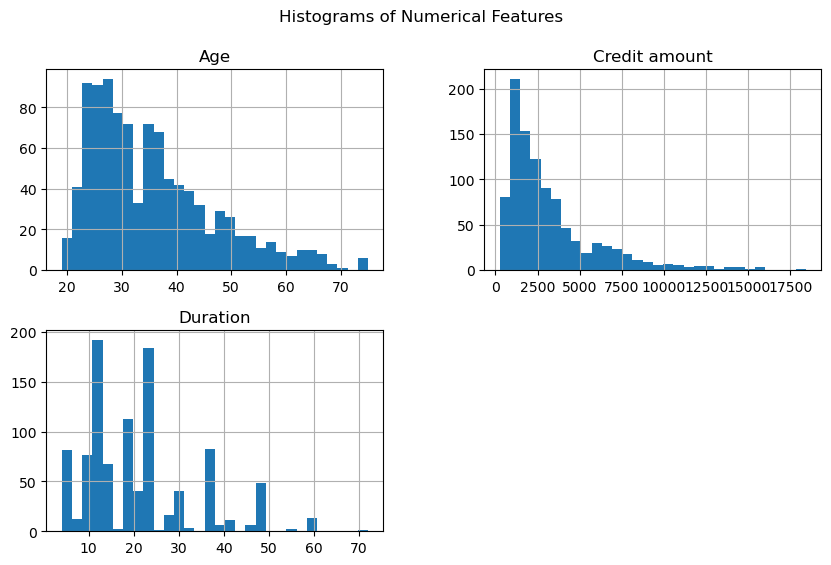

In [10]:
import matplotlib.pyplot as plt

# Ploting histograms for numerical columns
df[['Age', 'Credit amount', 'Duration']].hist(figsize=(10, 6), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()


Visualizing The Distribution of Categorical Features

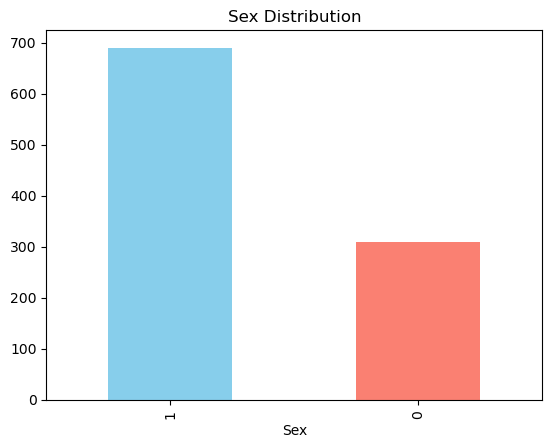

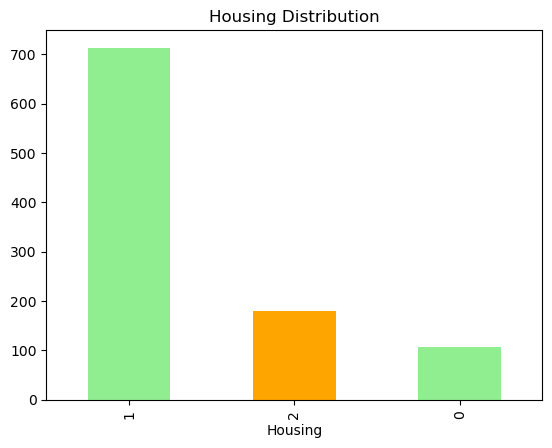

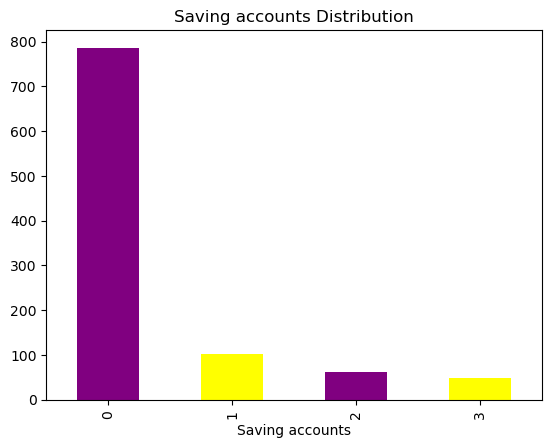

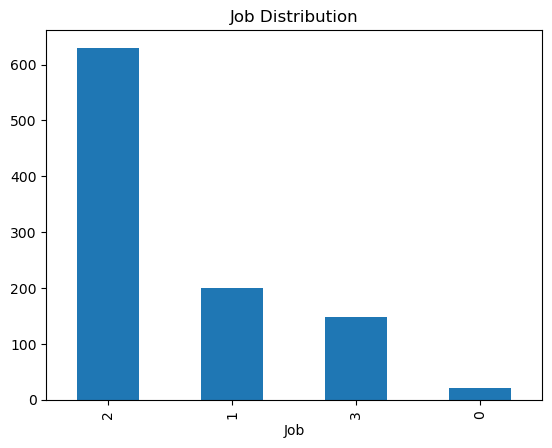

In [11]:
# Ploting bar charts for categorical columns
df['Sex'].value_counts().plot(kind='bar', title='Sex Distribution', color=['skyblue', 'salmon'])
plt.show()

df['Housing'].value_counts().plot(kind='bar', title='Housing Distribution', color=['lightgreen', 'orange'])
plt.show()

df['Saving accounts'].value_counts().plot(kind='bar', title='Saving accounts Distribution', color=['purple', 'yellow'])
plt.show()

df['Job'].value_counts().plot(kind='bar', title='Job Distribution')
plt.show()


Correlation Matrix for Numerical Features

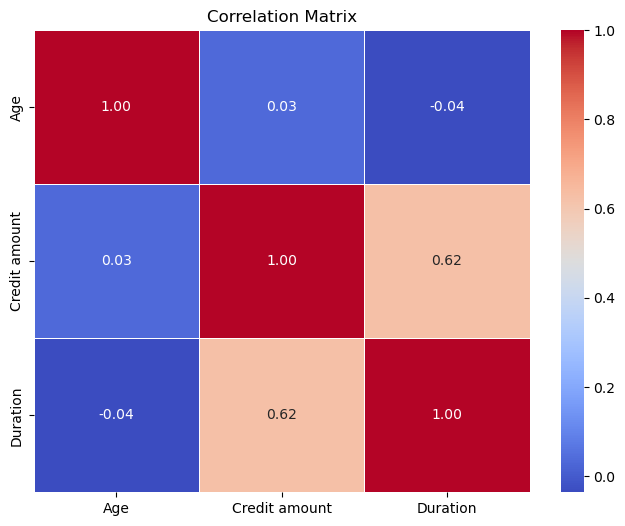

In [12]:
import seaborn as sns

# Calculating the correlation matrix
corr = df[['Age', 'Credit amount', 'Duration']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Pairplot for Feature Relationships

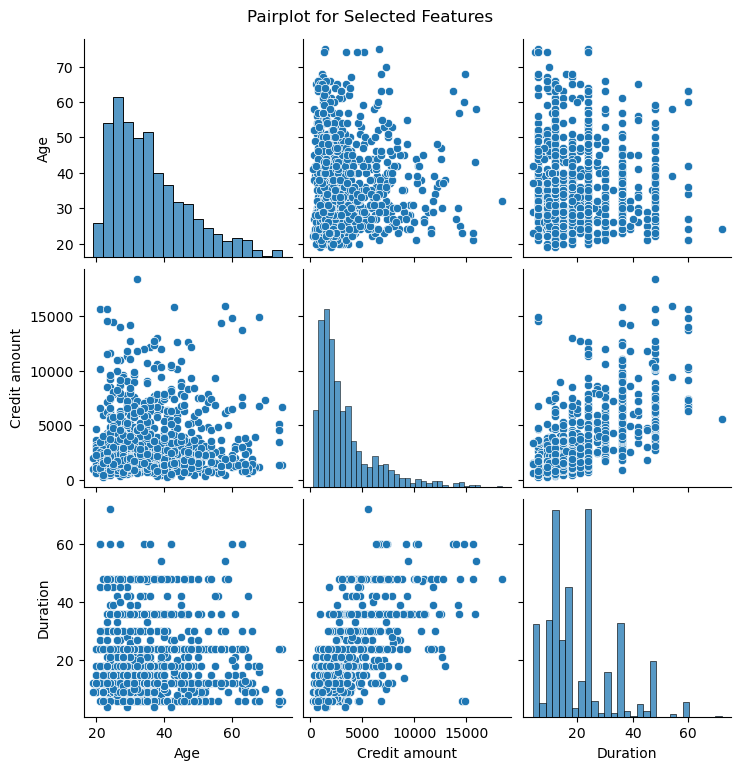

In [13]:
# Creating pair plot for selected features
sns.pairplot(df[['Age', 'Credit amount', 'Duration']])
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()


## Feature Scaling

We'll scale the numerical features: Age, Credit amount, and Duration using StandardScaler.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the numerical features
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])

# Checking the scaled values
print(df[['Age', 'Credit amount', 'Duration']].head())


        Age  Credit amount  Duration
0  2.766456      -0.745131 -1.236478
1 -1.191404       0.949817  2.248194
2  1.183312      -0.416562 -0.738668
3  0.831502       1.634247  1.750384
4  1.535122       0.566664  0.256953


## Model Building

In [15]:
# Importing the necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Defining the features (X) and target (y)
X = df[['Age', 'Credit amount', 'Duration']]
y = df['Risk']

# Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.905
Confusion Matrix:
[[130   6]
 [ 13  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       136
           1       0.89      0.80      0.84        64

    accuracy                           0.91       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.90      0.91      0.90       200



### Let's immprove it 

We will use SMOTE technique to Oversample the minority class

In [18]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Defining features (X) and target (y)
X = df[['Age', 'Credit amount', 'Duration']]
y = df['Risk']

# Spliting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training data (Over-sample the minority class)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Training the logistic regression model with the resampled data
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Making predictions
y_pred_res = model.predict(X_test)

# Evaluating the model
accuracy_res = accuracy_score(y_test, y_pred_res)
conf_matrix_res = confusion_matrix(y_test, y_pred_res)
class_report_res = classification_report(y_test, y_pred_res)

print(f"Accuracy with SMOTE: {accuracy_res}")
print(f"Confusion Matrix with SMOTE:\n{conf_matrix_res}")
print(f"Classification Report with SMOTE:\n{class_report_res}")


Accuracy with SMOTE: 0.945
Confusion Matrix with SMOTE:
[[130   6]
 [  5  59]]
Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.91      0.92      0.91        64

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

